In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input, Dropout
from tensorflow.keras.metrics import R2Score
from sklearn.preprocessing import MinMaxScaler
from src import *

/root/cryptobot-enviroment/.venv/lib/python3.12/site-packages/numpy/_core/getlimits.py:545: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe function.
This warnings indicates broken support for the dtype!
  machar = _get_machar(dtype)
2025-01-03 16:35:32.443941: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-03 16:35:32.451341: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-03 16:35:32.466798: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1735932932.533141   26432 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plu

In [2]:
# Fetch Ripple price data
df = read_yfinance_crypto_data("LTC-USD", "max", "1d")
scaler = MinMaxScaler()

[
    [train_date_series, train_data, normalized_data],
    [test_date_series, testData, normalized_test_data]
] = pre_process_ewt_data(df, scaler)

print(f"Train Data: {train_data.shape}\nTest Data: {testData.shape}")

test_target = testData
print(f"Train Target: {train_data.shape}\nTest Data: {test_target.shape}")

(3762,)
Cutoff:  1128
Cutoff:  1128
Cutoff:  1128
Train Data: (2634, 1)
Test Data: (1128, 1)
Train Target: (2634, 1)
Test Data: (1128, 1)


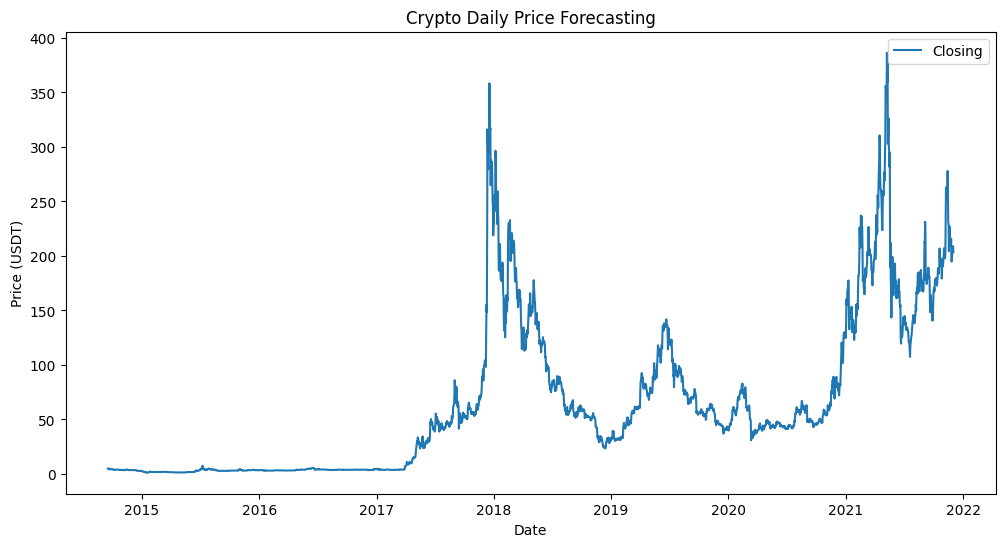

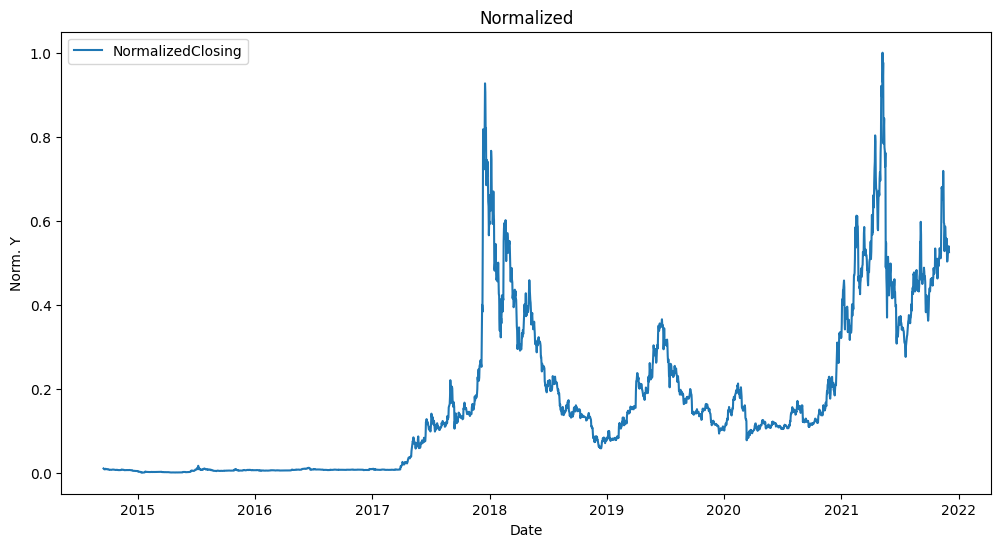

In [3]:
# Plot train data
plt.figure(figsize=(12, 6))
plt.plot(train_date_series, train_data, label='Closing')
plt.title('Crypto Daily Price Forecasting')
plt.xlabel('Date')
plt.ylabel('Price (USDT)')
plt.legend()

plt.figure(figsize=(12, 6))
plt.plot(train_date_series, normalized_data, label='NormalizedClosing')
plt.title('Normalized')
plt.xlabel('Date')
plt.ylabel('Norm. Y')
plt.legend()
plt.show()

In [4]:
# Prepare data for each EWT component
seq_len = 90


X, y, train_data, train_date_series = prepare_data(
    normalized_data,
    train_data,
    train_date_series,
    seq_len
)


print(X.shape, train_date_series.shape, y.shape)

(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(

In [5]:
# Create LSTM model
def create_lstm_model(input_shape):
    model = Sequential([
        Input(input_shape),
        LSTM(50, return_sequences=True),
        Dropout(0.3),
        LSTM(50),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model


In [ ]:
# Train separate LSTM models for each EWT component
model = create_lstm_model((seq_len, 13))
model.fit(X, y, epochs=100, verbose=2 )




2025-01-03 16:35:45.759312: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/100
80/80 - 8s - 100ms/step - loss: 8525.2637
Epoch 2/100
80/80 - 8s - 105ms/step - loss: 7745.9946
Epoch 3/100
80/80 - 6s - 75ms/step - loss: 7335.3354
Epoch 4/100
80/80 - 5s - 60ms/step - loss: 6990.1353
Epoch 5/100
80/80 - 5s - 60ms/step - loss: 6690.7632
Epoch 6/100
80/80 - 5s - 59ms/step - loss: 6430.7915
Epoch 7/100
80/80 - 5s - 57ms/step - loss: 6204.7280
Epoch 8/100
80/80 - 5s - 60ms/step - loss: 6010.3965
Epoch 9/100
80/80 - 5s - 60ms/step - loss: 5841.9033
Epoch 10/100
80/80 - 5s - 62ms/step - loss: 5699.6250
Epoch 11/100
80/80 - 5s - 58ms/step - loss: 5578.0835
Epoch 12/100
80/80 - 6s - 77ms/step - loss: 5475.3047
Epoch 13/100
80/80 - 6s - 80ms/step - loss: 5389.4131
Epoch 14/100
80/80 - 6s - 73ms/step - loss: 5317.4111
Epoch 15/100
80/80 - 6s - 71ms/step - loss: 5259.3608
Epoch 16/100
80/80 - 5s - 66ms/step - loss: 5211.4243
Epoch 17/100
80/80 - 5s - 65ms/step - loss: 5172.7520
Epoch 18/100
80/80 - 5s - 64ms/step - loss: 5142.0620
Epoch 19/100
80/80 - 5s - 66ms/step

In [ ]:
# Make predictions
predictions = np.zeros_like(y)
for i in range(seq_len, len(y)):
    inputs = normalized_data[i-seq_len:i]
    pred = model.predict(inputs.reshape(1, seq_len, 1 ), verbose=1)
    # Reshape the prediction to match the original data shape
    predictions[i] = pred

reshaped = predictions.reshape(-1, 1)


In [ ]:
print(train_data.shape, train_date_series.shape, reshaped.shape)
# Plot result
plt.figure(figsize=(12, 6))
plt.plot(train_date_series, train_data, label='Actual Price')
plt.plot(train_date_series, reshaped, label='Predictions')
plt.title('Ripple Hourly Price Forecasting')
plt.xlabel('Date')
plt.ylabel('Price (USDT)')
plt.legend()
plt.show()


In [ ]:
# Evaluate the model
mse = np.mean((train_data[seq_len:] - reshaped[seq_len:]) ** 2)
rmse = np.sqrt(mse)

mae = np.mean(np.abs(train_data[seq_len:] - reshaped[seq_len:]))
mape = np.mean(np.abs((train_data[seq_len:] - reshaped[seq_len:]) / train_data[seq_len:])) * 100

print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.4f}")

In [18]:
normalized_test_data = scaler.transform(testData)
X_test, y_test, testData, test_date_series = prepare_data(normalized_test_data, testData, test_date_series, seq_len)
y_test = y_test.reshape(-1, 1)
y_test.shape
print(X_test.shape)

(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(90, 13)
(

In [19]:
model.evaluate(X_test, y_test, verbose=2)

22/22 - 0s - 20ms/step - loss: 0.0080


0.008034183643758297

In [26]:
# Make test predictions
test_predictions = np.zeros_like(y_test)
print(X_test.shape)
for i in range(1):
    print(X_test[i].shape)
    pred = model.predict(X_test)
    
    # Reshape the prediction to match the original data shape
    print(pred.shape)
    test_predictions = pred

(693, 90, 13)
(90, 13)
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
(693, 1)


(693,) (693, 1) (693, 1)


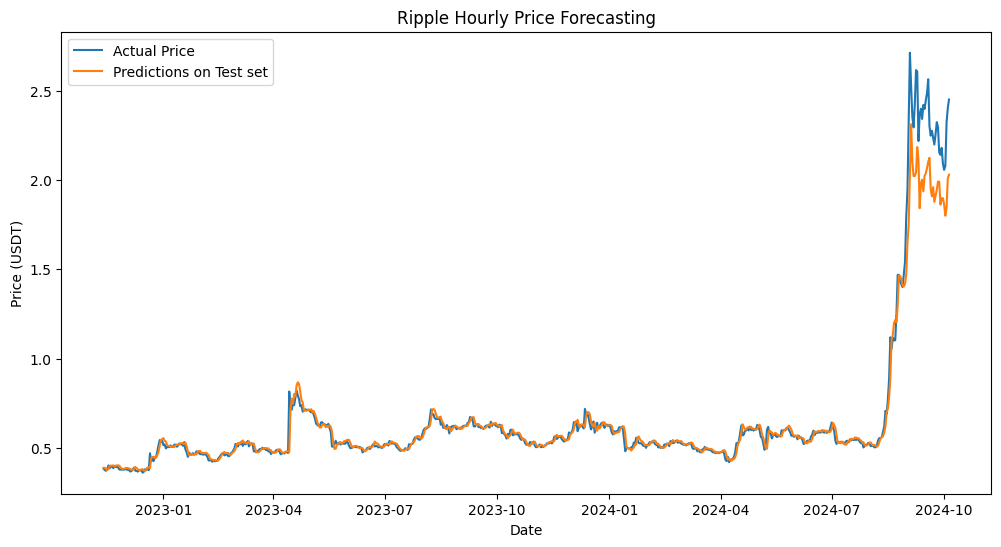

In [29]:
test_reshaped = test_predictions.reshape(-1, 1)
print(test_date_series.shape, testData.shape, test_reshaped.shape)
# Plot result
plt.figure(figsize=(12, 6))
plt.plot(test_date_series[:], y_test[:], label='Actual Price')
plt.plot(test_date_series[:], test_reshaped[:], label='Predictions on Test set')
plt.title('Ripple Hourly Price Forecasting')
plt.xlabel('Date')
plt.ylabel('Price (USDT)')
plt.legend()
plt.show()

In [30]:
# Evaluate the model 
r2 = R2Score()
testDataToUse = y_test[:]
testPredictionsToUse = test_reshaped[:]
print(testDataToUse.shape, testPredictionsToUse.shape)

r2.update_state(testDataToUse, testPredictionsToUse)
r2.result().numpy()

mse = np.mean((testDataToUse - testPredictionsToUse) ** 2)
rmse = np.sqrt(mse)

mae = np.mean(np.abs(testDataToUse - testPredictionsToUse))
mape = np.mean(np.abs((testDataToUse - testPredictionsToUse) / testDataToUse)) * 100
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.4f}")
print(f"accuracy: {r2.result().numpy()}")

(693, 1) (693, 1)
RMSE: 0.0896
MAE: 0.0331
MAPE: 3.2982
accuracy: 0.9530184864997864


In [31]:
!mkdir -p saved_models
model.save("saved_models/xrp-ewt-p90-1f-2L.keras")